## Modul 2 | Supervised and Unsupervised

### Latihan SciKit Learn Decision Tree

In [1]:
import sklearn
from sklearn import datasets
import pandas as pd

In [2]:
# load iris dataset
anemia = pd.read_csv('sample_data/diagnosed_cbc_data_v4.csv')

In [3]:
# Info dataset
anemia.info()

# Info 5 dataset teratas
anemia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [4]:
x = anemia.drop('Diagnosis', axis=1)
y = anemia['Diagnosis']

from sklearn.model_selection import train_test_split

# membagi dataset menjadi training dan testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
# model Dec. Tree
tree_model = DecisionTreeClassifier()

# train model
tree_model = tree_model.fit(x_train, y_train)

In [7]:
# model evaluation
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(x_test)
acc_score = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_score)

Accuracy:  0.981


In [8]:
# looking for mean and median for each columns to be used for prediction
# the purpose is to prevent value misinput
from statistics import mean, median

columns = anemia.columns # get column names

stats = {} # empty dict to store mean and median score

# loop for each column
for col in columns:
    col_data = anemia[col].dropna()

    # Check if the column contains numeric data
    try:
        col_data = pd.to_numeric(col_data, errors='raise')
    except ValueError:
        continue  # Skip non-numeric columns
        
    if col_data.empty:
        continue # skips empty column

    # calculate mean and median
    col_mean = mean(col_data)
    col_median = median(col_data)

    # store mean and median score
    stats[col] = {'mean': col_mean, 'median': col_median}

# Loop for print results
for col, value in stats.items():
    print(f"{col}:")
    print(f" Mean: {value['mean']}")
    print(f" Median: {value['median']}")
    print()

WBC:
 Mean: 7.8627166276346605
 Median: 7.4

LYMp:
 Mean: 25.845
 Median: 25.845

NEUTp:
 Mean: 77.511
 Median: 77.511

LYMn:
 Mean: 1.88076
 Median: 1.88076

NEUTn:
 Mean: 5.14094
 Median: 5.14094

RBC:
 Mean: 4.708266978922716
 Median: 4.6

HGB:
 Mean: 12.184551131928181
 Median: 12.3

HCT:
 Mean: 46.1526
 Median: 46.1526

MCV:
 Mean: 85.79391881342701
 Median: 86.6

MCH:
 Mean: 32.084839968774396
 Median: 27.8

MCHC:
 Mean: 31.739149102263855
 Median: 32.0

PLT:
 Mean: 229.9814207650273
 Median: 213.0

PDW:
 Mean: 14.312511572747853
 Median: 14.31251157

PCT:
 Mean: 0.26028
 Median: 0.26028



In [9]:
# getting class_names
label_col = anemia['Diagnosis']

# Get unique class names
cl_names = label_col.unique()

print("Class names: ")
for name in cl_names:
    print(name)

Class names: 
Normocytic hypochromic anemia
Iron deficiency anemia
Other microcytic anemia
Leukemia
Healthy
Thrombocytopenia
Normocytic normochromic anemia
Leukemia with thrombocytopenia
Macrocytic anemia


In [10]:
# model prediction
print(tree_model.predict([[12.4, 18.7, 81.2, 3.14, 7.7, 5.09, 13.2, 35.2, 77.6, 36.5, 37.50, 244.177, 19.72, 0.187]])[0])

Leukemia


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [11]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "anemia_tree.dot",
    feature_names = ['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT'],
    class_names = ['Normocytic hypochromic anemia', 'Iron deficiency anemia', 'Other microcytic anemia', 'Leukimia', 'Healthy', 'Thrombocytopenia', 'Normocytic normochromic anemia', 'Leukemia with thrombocytopenia', 'Macrocytic anemia'],
    rounded = True,
    filled = True
)

### Latihan SciKit Learn Linear Regression

In [12]:
import numpy as np

# membuat data jumlah kamar
bedrooms = np.array([1, 1, 2, 2, 3, 4, 4, 5, 5, 5])

# membuat harga rumah, asumsi dalam dollar
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

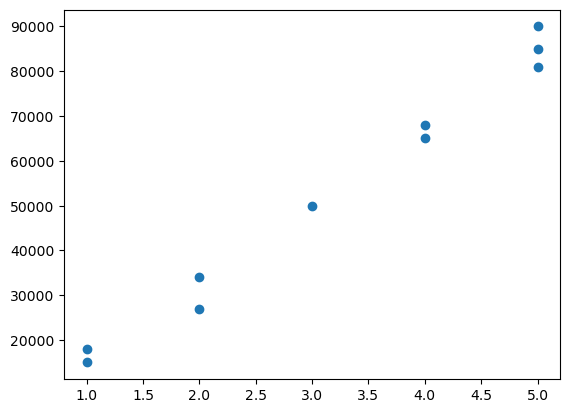

In [13]:
# menampilkan scatter plot dari dataset
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bedrooms, house_price)

In [14]:
from sklearn.linear_model import LinearRegression

# latih model dengan Linear Regression.fit()
bedrooms = bedrooms.reshape(-1, 1)
linreg = LinearRegression()
linreg.fit(bedrooms, house_price)

LinearRegression()

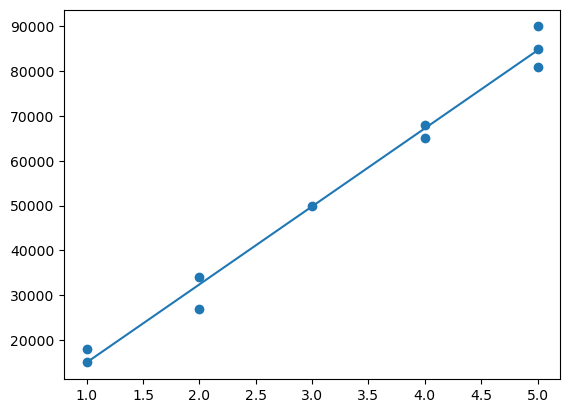

In [15]:
# menampilkan plot hubungan antara jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, linreg.predict(bedrooms))

### Latihan SKLearn Logistic Regression

In [16]:
SNAds = pd.read_csv('sample_data/Social_Network_Ads.csv')

In [17]:
SNAds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
SNAds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [19]:
# drop kolom yang tidak diperlukan
data_sna = SNAds.drop(columns=['User ID'])

# proses one-hot encoding dengan pd.get_dummies()
data = pd.get_dummies(data_sna, dtype="int")
data

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [20]:
# pisahkan atribut dan label
predictions = ['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']
i = data[predictions]
j = data['Purchased']

In [21]:
# lakukan normalisasi terhadap data yang kita miliki
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(i)
scaled_data = scaler.transform(i)
scaled_data = pd.DataFrame(scaled_data, columns = i.columns)
scaled_data.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204


In [22]:
# bagi data menjadi train dan test untuk setiap atribut dan label
i_train, i_test, j_train, j_test = train_test_split(scaled_data, j, test_size=0.2, random_state=1)

In [23]:
from sklearn import linear_model

# latih model fungsi fit
logreg = linear_model.LogisticRegression()
logreg.fit(i_train, j_train)

LogisticRegression()

In [24]:
# model accuracy
logreg.score(i_test, j_test)

0.825

### Latihan SciKit Learn K-Means Clustering

In [25]:
mall_cust = pd.read_csv('sample_data/Mall_Customers.csv')
mall_cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
# changing column names
df_mc = mall_cust.rename(columns = {
    'Gender': 'gender', 'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})

# edit categorial into numeric
df_mc['gender'].replace(['Female', 'Male'], [0,1], inplace = True)

# show preprocessed data
df_mc.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [27]:
from sklearn.cluster import KMeans

# drop cust id and gender
g = df_mc.drop(['CustomerID', 'gender'], axis=1)

# list containing inertia
cluster = []
for o in range(1, 11):
    km = KMeans(n_clusters=o).fit(g)
    cluster.append(km.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0, 0.5, 'Inertia')

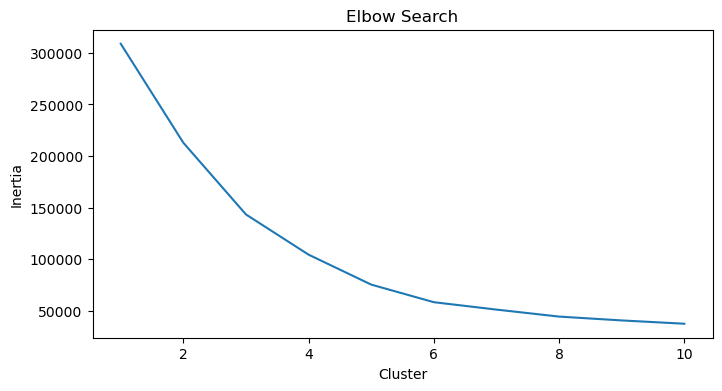

In [28]:
%matplotlib inline
import seaborn as sns

# plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=cluster, ax=ax)
ax.set_title('Elbow Search')
ax.set_xlabel('Cluster')
ax.set_ylabel('Inertia')

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


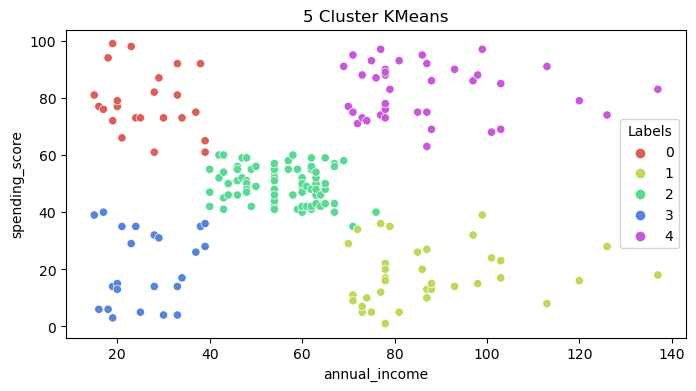

In [29]:
# create object KMeans
km5 = KMeans(n_clusters=5).fit(g)

# add label column
g['Labels'] = km5.labels_

# plot KMeans with 5 clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(x=g['annual_income'], y=g['spending_score'], hue=g['Labels'],
               palette=sns.color_palette('hls', 5))
plt.title('5 Cluster KMeans')
plt.show()

### Latihan SciKit Learn PCA

In [30]:
iris = datasets.load_iris()
atribut = iris.data
label = iris.target

m_train, m_test, n_train, n_test = train_test_split(atribut, label, test_size=0.2, random_state=1)

In [31]:
from sklearn import tree

dec_tree = tree.DecisionTreeClassifier()
mod_1 = dec_tree.fit(m_train, n_train)
mod_1.score(m_test, n_test)

0.9666666666666667

In [32]:
from sklearn.decomposition import PCA

In [33]:
# object PCA 4 component
pca = PCA(n_components = 4)

# implement PCA on dataset
pca_attributes = pca.fit_transform(m_train)

# view variance each attributes
pca.explained_variance_ratio_

array([0.92848323, 0.04764372, 0.01931005, 0.004563  ])

In [34]:
# 2 components
pca1 = PCA(n_components = 2)
m_train_pca = pca.fit_transform(m_train)
m_test_pca = pca.fit_transform(m_test)

In [35]:
# accurate test
mod_2 = dec_tree.fit(m_train_pca, n_train)
mod_2.score(m_test_pca, n_test)

0.9